What this notebook does:

The distribution of review lengths and review dates for scraped Yelp coffee shop reviews are visualized. Only reviews for businesses defined to be coffee shops are considered.

Saves the precovid reviews (those occuring in the year 2019 or earlier) to './ProcessedData/reviews_precovid_txtprocessed.csv'

In [1]:
#Step one directory up to access the yelp scraping function in the helper_functions module
import os
print(os.getcwd())
os.chdir('../')
os.getcwd()

/Users/thomasyoung/Dropbox/TYInsightProject/ProcessingRawYelpData


'/Users/thomasyoung/Dropbox/TYInsightProject'

In [2]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [3]:
shops = pd.read_csv('./ProcessedData/coffeeshops_withcfcutoff.csv')
reviews = pd.read_csv('./ProcessedData/allreviews_txtprocessed.csv')
merged = pd.merge(shops,reviews,how='inner',on = ['alias'])
print(reviews.shape)
print(merged.shape)
print(merged.alias.value_counts())

(65960, 7)
(48395, 30)
sweet-moment-new-york                119
grace-street-new-york                116
bibble-and-sip-new-york-5            116
lroom-cafe-new-york-2                112
kaffe-1668-south-new-york            112
                                    ... 
joe-coffee-company-new-york-13        15
starbucks-new-york-161                15
tulo-house-new-york                   15
dunkin-new-york-17                    15
the-marlton-espresso-bar-new-york     15
Name: alias, Length: 791, dtype: int64


In [3]:
print(shops[shops.ntacode=='MN27'].alias.value_counts())
print(merged[merged.ntacode=='MN27'].alias.value_counts())


blue-bottle-coffee-new-york-8             1
chillhouse-cafe-new-york                  1
rise-cafe-delancey-new-york               1
oliver-coffee-new-york                    1
kabisera-new-york-2                       1
tous-les-jours-new-york-3                 1
starbucks-new-york-428                    1
ludlow-coffee-supply-new-york             1
dr-smood-orchard-organic-cafe-new-york    1
cafe-grumpy-new-york-6                    1
classic-coffee-shop-new-york              1
waypoint-cafe-new-york                    1
bluestockings-new-york                    1
starbucks-new-york-524                    1
round-k-new-york                          1
the-granddaddy-new-york-2                 1
good-thanks-nyc-new-york                  1
roasting-plant-new-york-4                 1
russ-and-daughters-cafe-new-york-5        1
silk-road-cafe-new-york                   1
kodawari-coffee-new-york                  1
the-good-kind-new-york                    1
caffe-vita-lower-east-side-new-y

In [4]:
print(merged.shape)
print(merged.mreviewtxt[10])
print(merged.reviewtxt[10])

(48395, 30)
stopped here sunday  / /  late in the day after a gallery opening nearby. had a fantastic beer and the hummus sandwich was something i would eat every day if i could. the atmosphere is nice  small in a cozy sort of way and service was very good. will definitely stop back.
Stopped here Sunday 10/11/19 late in the day after a gallery opening nearby. Had a fantastic beer and the hummus sandwich was something I would eat every day if I could. The atmosphere is nice, small in a cozy sort of way and service was very good. Will definitely stop back.


### Plotting the distribution of review lengths

In [5]:
#Look at the length of the reviews
splitrev = merged.reviewtxt.str.split('.')

In [6]:
numsentences = splitrev.str.len()
merged['numsentences'] = pd.Series(numsentences)

5.0
count    48395.000000
mean         6.657899
std          4.899790
min          1.000000
25%          4.000000
50%          5.000000
75%          8.000000
max        119.000000
Name: reviewtxt, dtype: float64
96        1
69        1
75        1
119       1
51        1
       ... 
7      4115
6      5163
3      6070
5      6493
4      7229
Name: reviewtxt, Length: 69, dtype: int64


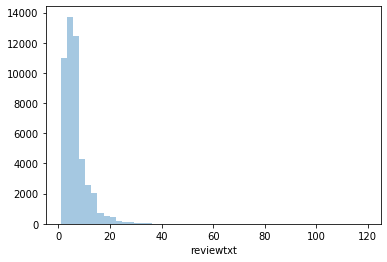

In [7]:
sns.distplot(numsentences,kde=False)
print(numsentences.median())
print(numsentences.describe())
print(numsentences.value_counts().sort_values())

In [8]:
print(merged.mreviewtxt[merged.numsentences>40])
print(merged.mreviewtxt[713])
print(merged.mreviewtxt[2396])

590      kam hing has the best sponge cakes  ....and be...
743      often  when i shower in my giant houston apart...
2513     ahh  okay  this place is awesome. they have aw...
2617     pros:  -healthy  decent lunch food -nice  acco...
3257     let me start off by saying that i am not one w...
                               ...                        
45645    imagine this scenario....  you have spend the ...
45755    the mouse was having the time of its life. mai...
45798    yes  this is a lovely setting.......very paris...
46066    scrolling thourough the reviews here  i will a...
46325    this used to be a great place to sit and colle...
Name: mreviewtxt, Length: 77, dtype: object
it's hard to believe there are a few bookstores left in new york.    this small and clean bookstore has a local feel  an extensive news periodical section  a coffee shop  and a wide range of books that seems well thought out and extensive for the limited space.   most books only come in  -  copes but again

### Plotting the distribution of the date of reviews

In [9]:
#Looking at the dates of reviews. How are they distributed
#Also try to count the number of 2019 reviews for each coffee shop. This should provide a decent measure of new
#visitors, but not returning visitors.
dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in merged.date.to_list()]

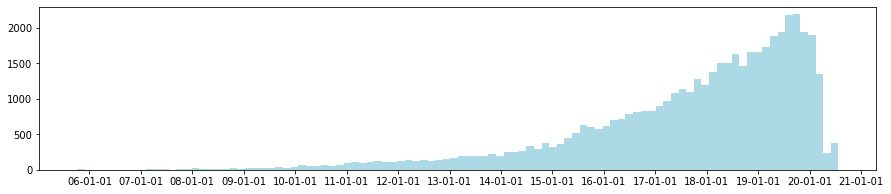

In [10]:
revdates = mdates.date2num(dates)
merged['revdates'] = pd.Series(revdates)

fig, ax = plt.subplots(1,1,figsize=(15,3))
ax.hist(revdates, bins=100, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.show()

Review were extracted in reverse chronological order, so it makes sense that most dates are in 2019 and fall off the further back in time we go. Interestingly, january of 2020 has fewer reviews than November of 2019, but more than January of 2019. Perhaps there are differences in numbers of reviews from month to month. For the first have of 2020, there is also a steep drop-off in reviews probably due to decreased visits to coffee shops from covid-19.  For some of the shops, the top 100 reviews include reviews made in the year 2006 - these shops are very rarely reviewed.

In [11]:
splitdates = merged.date.str.split('-',expand=True)
splitdates.columns = ['revyear','revmonth','revday']

In [12]:
merged = pd.concat([merged,splitdates],axis=1)

In [13]:
#The reviews from 2006 are from coffe-shops that have fewer than 100 reviews.
merged[merged.revyear=='2006'].loc[:,['alias','numreviews','ntaname']]

,alias,numreviews,ntaname
5400,dunkin-new-york-131,20,SoHo-TriBeCa-Civic Center-Little Italy
14079,leonidas-new-york-3,68,Battery Park City-Lower Manhattan
14080,leonidas-new-york-3,68,Battery Park City-Lower Manhattan
23797,starbucks-new-york-362,52,Hudson Yards-Chelsea-Flatiron-Union Square
32033,pret-a-manger-new-york-7,77,Midtown-Midtown South
37957,starbucks-new-york-188,52,Clinton
38142,dunkin-new-york-76,52,Clinton
38143,dunkin-new-york-76,52,Clinton
39881,starbucks-new-york-354,60,Lenox Hill-Roosevelt Island
40962,starbucks-new-york-352,69,Upper East Side-Carnegie Hill


In [14]:
merged.columns

Index(['id', 'name', 'alias', 'is_closed', 'review_count', 'price', 'rating',
       'transactions', 'latitude', 'longitude', 'geometry', 'index_right',
       'boro_code', 'boro_name', 'county_fip', 'ntacode', 'ntaname',
       'shape_area', 'shape_leng', 'catlist', 'numcoffeemen', 'numreviews',
       'fraccof', 'name_top5count', 'reviewidx', 'shopidx', 'date',
       'revrating', 'reviewtxt', 'mreviewtxt', 'numsentences', 'revdates',
       'revyear', 'revmonth', 'revday'],
      dtype='object')

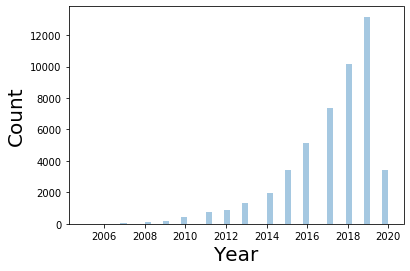

In [23]:
#Reviews are mostly recent.  The futher back you go, the fewer the number of reviews there are.
snsplot = sns.distplot(merged.revyear,kde=False)
snsplot.set_xlabel('Year',fontsize=20)
snsplot.set_ylabel('Count',fontsize=20)
snsplot.figure.savefig('./Figures/reviewyears.png',bbox_inches="tight")

In [78]:
#For each coffee shop, count the number of reviews for each year.
#I will use the number of reviews in a year as a measure of the number of new visitors to each coffee shop
numrevbyyear = merged.groupby(['alias','revyear']).count()

In [79]:
numrevbyyear.sort_values(by='ntaname').tail(100)

,,id,name,is_closed,review_count,price,rating,transactions,latitude,longitude,geometry,...,reviewidx,shopidx,date,revrating,reviewtxt,mreviewtxt,numsentences,revdates,revmonth,revday
alias,revyear,,,,,,,,,,,,,,,,,,,,,
paper-coffee-new-york,2019,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
caffè-panna-new-york,2020,44,44,44,44,0,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
for-five-coffee-roasters-new-york-2,2018,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
la-colombe-coffee-new-york-8,2019,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
irving-farm-new-york-new-york-13,2017,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
culture-espresso-new-york,2019,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
frisson-espresso-new-york,2019,86,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,86,86,86,86
bibble-and-sip-new-york-5,2019,87,87,87,87,87,87,87,87,87,87,...,87,87,87,87,87,87,87,87,87,87


### Saving only the reviews occuring prior to 2020

In [80]:
mergedprecovid = merged[(merged.revyear.astype(int) <= 2019) | (merged.revmonth.astype(int)<=1)]

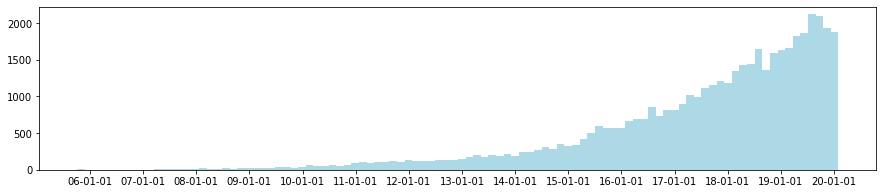

In [81]:
mergedprecovid.shape
fig, ax = plt.subplots(1,1,figsize=(15,3))
ax.hist(mergedprecovid.revdates, bins=100, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.show()

In [82]:
print(merged.shape)
print(merged[merged.ntacode=='MN27'].alias.value_counts())


(48395, 35)
good-thanks-nyc-new-york                  100
roasting-plant-new-york-4                  73
round-k-new-york                           60
caffe-vita-lower-east-side-new-york        60
russ-and-daughters-cafe-new-york-5         60
kabisera-new-york-2                        60
bluestockings-new-york                     60
ludlow-coffee-supply-new-york              56
classic-coffee-shop-new-york               44
dr-smood-orchard-organic-cafe-new-york     40
tous-les-jours-new-york-3                  40
cafe-grumpy-new-york-6                     40
silk-road-cafe-new-york                    40
blue-bottle-coffee-new-york-8              40
the-granddaddy-new-york-2                  40
starbucks-new-york-428                     40
kodawari-coffee-new-york                   31
starbucks-new-york-524                     30
waypoint-cafe-new-york                     28
oliver-coffee-new-york                     27
rise-cafe-delancey-new-york                26
the-good-kind-new-york

In [83]:
mergedprecovid = mergedprecovid[reviews.columns]

In [84]:
mergedprecovid.head(10)

,reviewidx,shopidx,alias,date,revrating,reviewtxt,mreviewtxt
6,6,0,little-canal-new-york-2,2019-12-21,3.0,It was my first time to the Little Canal. I w...,it was my first time to the little canal. i w...
7,7,0,little-canal-new-york-2,2019-12-19,5.0,Just moved to the area and although there are ...,just moved to the area and although there are ...
8,8,0,little-canal-new-york-2,2019-12-14,5.0,"Daytime: cafe. Nighttime: chillest, coziest ba...",daytime: cafe. nighttime: chillest coziest ba...
9,9,0,little-canal-new-york-2,2019-11-04,4.0,I always end up in here after I go to the Metr...,i always end up in here after i go to the metr...
10,10,0,little-canal-new-york-2,2019-10-26,5.0,Stopped here Sunday 10/11/19 late in the day a...,stopped here sunday / / late in the day afte...
11,11,0,little-canal-new-york-2,2019-10-19,5.0,Super cute and great music choice! It's a grea...,super cute and great music choice it's a grea...
12,12,0,little-canal-new-york-2,2019-10-12,1.0,Came in to do some work like many other people...,came in to do some work like many other people...
13,13,0,little-canal-new-york-2,2019-09-24,1.0,I got charged $8 for a croissant and iced coff...,i got charged for a croissant and iced coff...
14,14,0,little-canal-new-york-2,2019-09-22,5.0,best Cafe food in NYC... It's a small one pers...,best cafe food in ... it's a small one person ...
15,15,0,little-canal-new-york-2,2019-09-02,4.0,Stopped in here to kill some time while waitin...,stopped in here to kill some time while waitin...


In [85]:
mergedprecovid.to_csv('./ProcessedData/reviews_precovid_txtprocessed.csv',index=False)

In [86]:
print(mergedprecovid.alias.value_counts())

kaffe-1668-south-new-york     110
happy-bones-nyc-new-york      110
la-colombe-coffee-new-york    108
simon-sips-new-york-4         107
12-corners-new-york-4         106
                             ... 
bandit-new-york-6              10
book-club-new-york             10
787-coffee-new-york-5           9
nuts-factory-new-york           9
eat-pretty-new-york-4           6
Name: alias, Length: 791, dtype: int64
